In [13]:
# Import Data Manipulation Libraries
import numpy as np
import pandas as pd

# Import Data Visualization Libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Import Data Filter Warning Libraries
import warnings
warnings.filterwarnings('ignore')

# Import Data Logging Libraries
import logging
logging.basicConfig(level = logging.INFO,
                    filename = 'model.log',
                    filemode = 'w',
                    format = '%(asctime)s - %(levelname)s - %(message)s',
                    force=True)

In [14]:
logging.info('Importing Dataset Using Pandas Function')

In [15]:
#Load the dataset
url = 'https://raw.githubusercontent.com/vinnithakur/Crop_Recommendation_Model/refs/heads/main/Crop_Recommendation.csv '
df = pd.read_csv(url, sep=",")
df.sample(frac = 1)

,Nitrogen,Phosphorus,Potassium,Temperature,Humidity,pH_Value,Rainfall,Crop
2048,84,40,42,26.283057,73.357635,6.704274,186.689828,Jute
1608,39,24,14,30.554726,90.903438,7.189260,106.071198,Orange
665,35,52,19,27.106068,89.895933,6.698574,37.456806,MungBean
1407,114,30,51,29.249085,90.069981,6.069172,25.934965,Muskmelon
286,30,75,81,19.417897,16.804722,6.408438,68.495119,ChickPea
...,...,...,...,...,...,...,...,...
1869,20,28,26,26.379785,91.498830,5.547595,167.047100,Coconut
1418,82,18,48,29.095883,94.167484,6.159051,26.705813,Muskmelon
296,48,65,78,17.437327,14.338474,7.861128,73.092670,ChickPea
1864,6,13,29,27.311557,99.969060,5.832608,201.825863,Coconut


In [16]:
# Performing Univariate Analysis

from collections import OrderedDict

stats = []

for i in df.columns:
    if df[i].dtypes != 'object':
        
        numerical_stats = OrderedDict({
            'Feature': i,
            'Count': df[i].count(),
            'Mean': df[i].mean(),
            'Median': df[i].median(),
            'Mode': df[i].mode().values[0],
            'Standard Deviation': df[i].std(),
            'Variance': df[i].var(),
            'Skewness': df[i].skew(),
            'Kurtosis': df[i].kurtosis(),
            'Min': df[i].min(),
            '25th Percentile': df[i].quantile(0.25),
            'Median': df[i].median(),
            '75th Percentile': df[i].quantile(0.75),
            'Max': df[i].max()
        })
        
        stats.append(numerical_stats)
stats = pd.DataFrame(stats)
stats

,Feature,Count,Mean,Median,Mode,Standard Deviation,Variance,Skewness,Kurtosis,Min,25th Percentile,75th Percentile,Max
0,Nitrogen,2200,50.551818,37.000000,22.000000,36.917334,1362.889537,0.509721,-1.058240,0.000000,21.000000,84.250000,140.000000
1,Phosphorus,2200,53.362727,51.000000,60.000000,32.985883,1088.068460,1.010773,0.860279,5.000000,28.000000,68.000000,145.000000
2,Potassium,2200,48.149091,32.000000,17.000000,50.647931,2565.212869,2.375167,4.449354,5.000000,20.000000,49.000000,205.000000
3,Temperature,2200,25.616244,25.598693,8.825675,5.063749,25.641550,0.184933,1.232555,8.825675,22.769375,28.561654,43.675493
4,Humidity,2200,71.481779,80.473146,14.258040,22.263812,495.677307,-1.091708,0.302134,14.258040,60.261953,89.948771,99.981876
5,pH_Value,2200,6.469480,6.425045,3.504752,0.773938,0.598980,0.283929,1.655581,3.504752,5.971693,6.923643,9.935091
6,Rainfall,2200,103.463655,94.867624,20.211267,54.958389,3020.424469,0.965756,0.607079,20.211267,64.551686,124.267508,298.560117


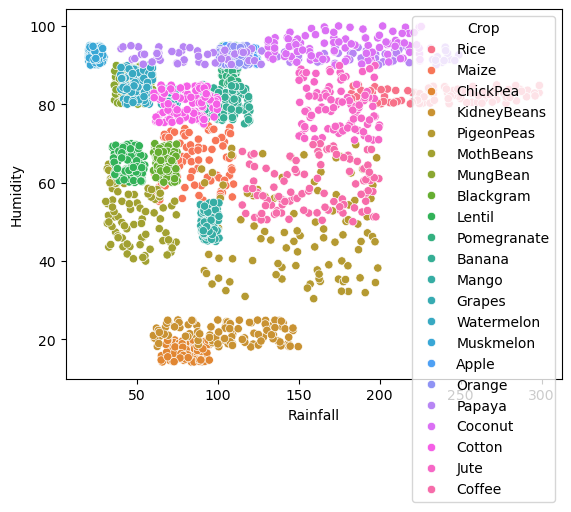

In [17]:
sns.scatterplot(data = df, x = 'Rainfall',y = 'Humidity',hue = 'Crop')
plt.show()

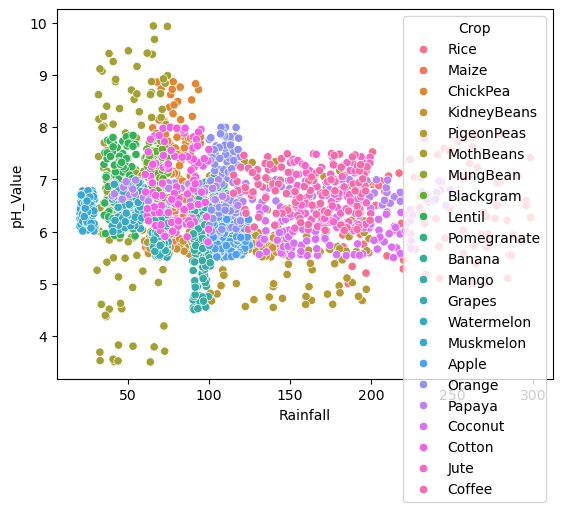

In [18]:
sns.scatterplot(data = df, x = 'Rainfall',y = 'pH_Value',hue = 'Crop')
plt.show()

In [19]:
# Checking null values if any
df.isnull().sum()

Nitrogen       0
Phosphorus     0
Potassium      0
Temperature    0
Humidity       0
pH_Value       0
Rainfall       0
Crop           0
dtype: int64

In [20]:
# Converting Categorical column to Numerical  -- Encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

df['Crop'] = le.fit_transform(df['Crop'])

In [21]:
df.sample(frac = 1)

,Nitrogen,Phosphorus,Potassium,Temperature,Humidity,pH_Value,Rainfall,Crop
242,36,76,75,18.381204,16.638052,8.736338,70.520567,3
604,22,56,17,29.878881,87.327612,6.890780,44.752159,14
1969,100,48,17,23.780512,83.038788,7.827878,66.265559,6
1573,7,141,195,23.881246,93.450676,5.514253,104.911666,0
448,5,62,23,27.934828,66.454571,4.722222,145.372880,18
...,...,...,...,...,...,...,...,...
1130,11,36,31,27.920633,51.779659,6.475449,100.258567,12
602,36,55,20,27.014704,84.342627,6.635969,55.296354,14
1853,24,27,34,28.878630,95.113203,6.203377,145.058312,4
1190,7,31,27,31.328637,47.593196,6.524114,94.673447,12


In [22]:
df.Crop.value_counts()

Crop
20    100
11    100
8     100
6     100
4     100
17    100
16    100
0     100
15    100
21    100
7     100
12    100
1     100
19    100
10    100
2     100
14    100
13    100
18    100
9     100
3     100
5     100
Name: count, dtype: int64

In [23]:
df.corr()['Crop']

Nitrogen      -0.031130
Phosphorus    -0.491006
Potassium     -0.346417
Temperature    0.113606
Humidity       0.193911
pH_Value      -0.012253
Rainfall       0.045611
Crop           1.000000
Name: Crop, dtype: float64

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score
X = df.drop(columns = ['Crop','Rainfall'], axis = 1)
y = df['Crop']

X_train,X_test,y_train,y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

from  sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(accuracy_score(y_test, y_pred))

0.9712121212121212


In [28]:
model.feature_importances_

array([0.13369361, 0.18396425, 0.22087137, 0.11834711, 0.2638193 ,
       0.07930437])